Naive Bayes classification of discrete variables 
离散变量贝叶斯分类

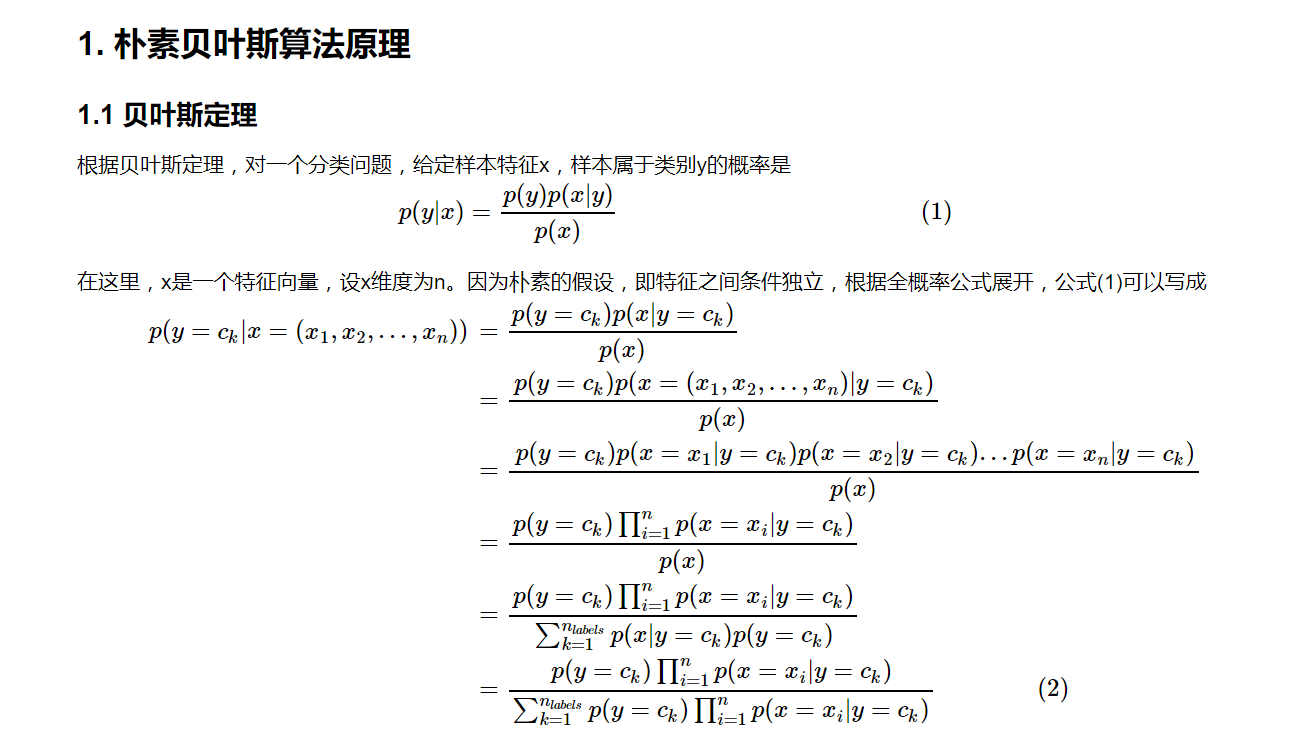

1.前三步将p(x|y)进行分解成p(x1,x2,x3|y)的形式，，在朴素贝叶斯的情况下，每个之间它是独立的可以转化成个个p(x1|y)*p(x2|y)*p(x3|y)的形式，这样方便了我的计算  
2.后面三步曲转化p(x)   
3.第五步全概率公式，将p(x)展开   
5.这里的Ck是指我有c1,c2多种可能性，独立性展开 p(x|y)=p(x1|y)*p(x2|y)*p(x3|y) 同1   

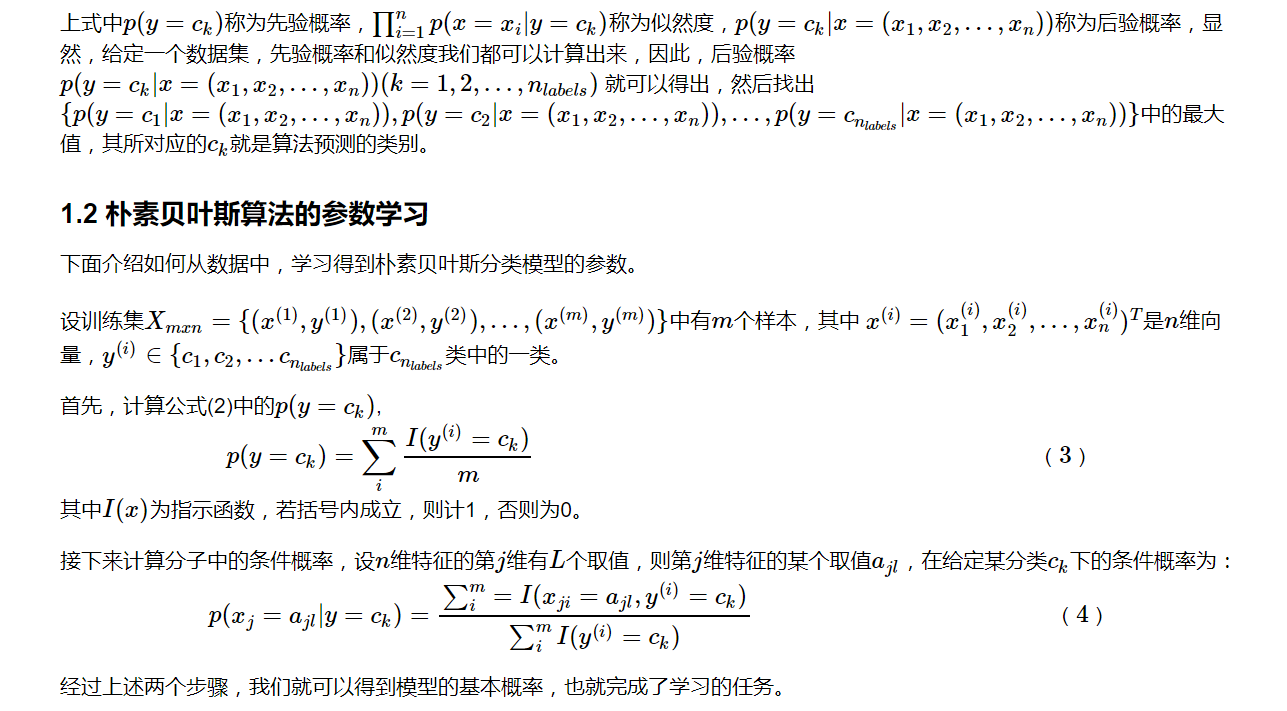

朴素贝叶斯算法的参数学习  
1.得到先验概率p(y=ck)  
2.得到条件概率p(xj|y=ck)  

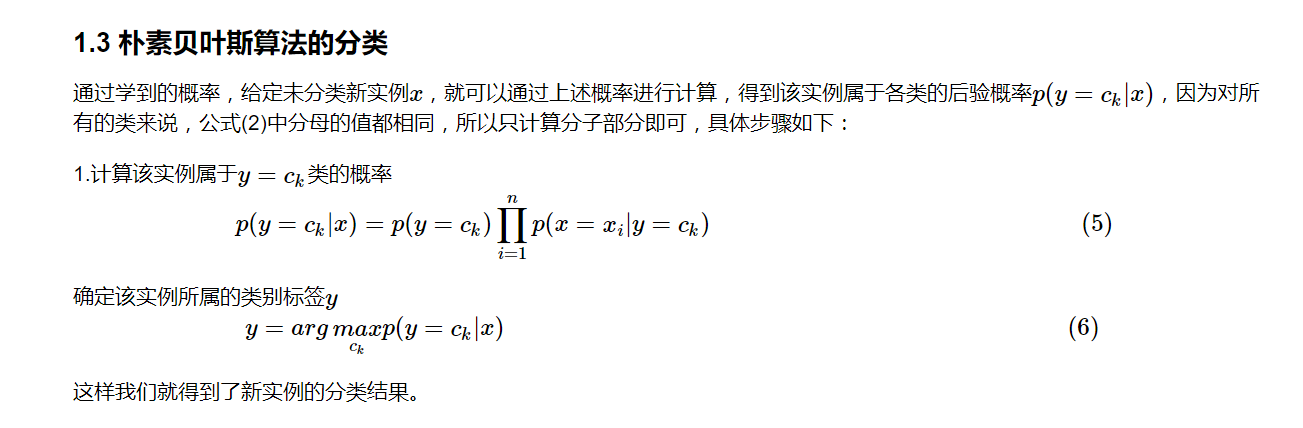


3. 朴素贝叶斯算法的注意事项


上一节(第2节)可以看出，P(转化|Mx上海)=0，也就是说，我们得到了‘上海男人不转化’这个结论，显然这是不合理的，之所以出现了这样不合理的结果，是因为我们的训练集中没有上海男人有过转化，也许是我们的数据集收集太少或者其它原因导致的。所以我们应该对我们的结果进行修正。通常的修正方法是用拉普拉斯平滑方法。

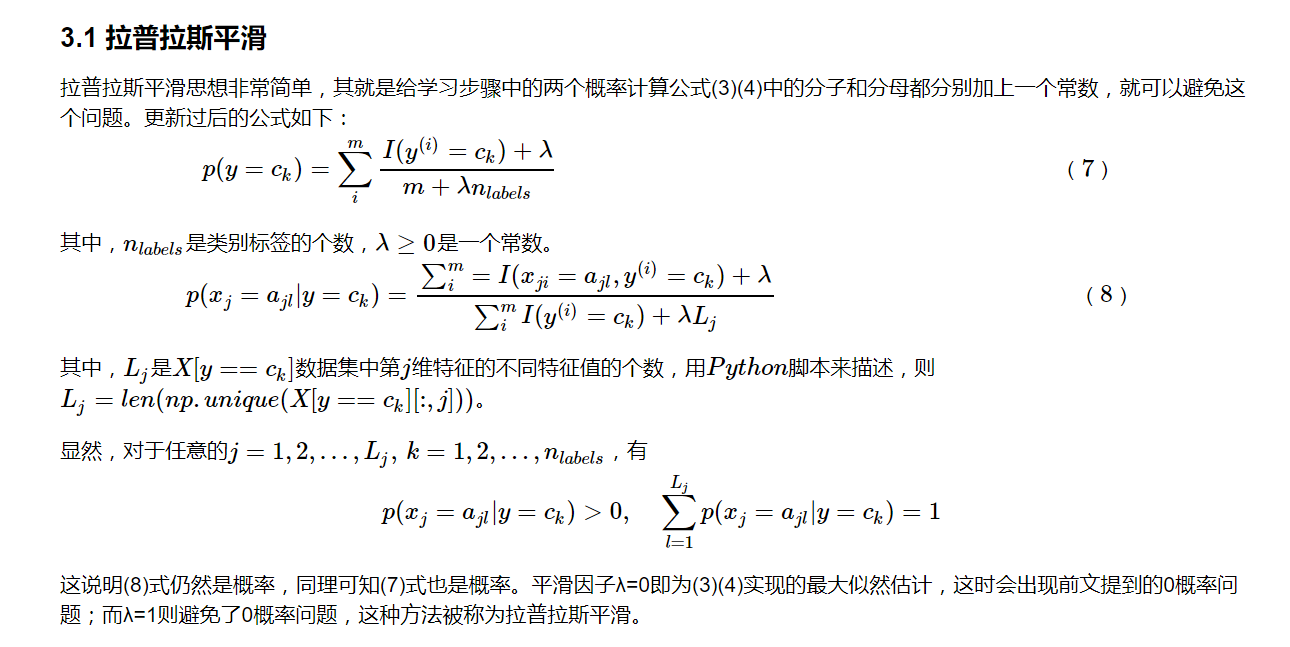

这里主要是对1.2的步骤结果进行修正，考虑到分母为0的情况

3.2 概率连乘的问题


在具体的实现代码过程中，我们有一点需要注意，就是很多个大于0且小于1的数累乘最终会接近于0，由于计算机的位数限制，所以多个概率相乘之后的数值在计算机内存中保存的数值是0。针对这个问题，我们通常将概率连乘式子取对数，将累乘的运算转换成累加的运算，这样就避免了上述的问题。

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

In [ ]:
class NaiveBayes:
    def _inti_(self):
        self.classes = None
        self.X = None
        self.y = None
        self.parameters = [] #存储每个类别中各特征取值的概率参数
    
    def fit(self, X, y):
        #训练模型，计算每个类别下各个特征取值的概率参数
        self.X = X
        self.y = y
        self.classes = np.unquie(y) #得到所有的标签
        for i in range(len(self.classes)):
            #遍历每一类，提取 c 类 
            c = self.classes[i]
            x_where_c = X[np.where(y == c)] #得到该类别的所有样本
            self.parameters.append([]) #为该类别初始化一个空列表，方便后面代码添加每类的准确率
            for j in range(len(x_where_c.shape[1])):  #x.shape[1]是列数
                x_where_c_j = x_where_c[:,j]
                class_c_j = np.unquie(x_where_c_j) #计算每一类c中第j个特征的取值
                parameters = {}
                for k in range(len(class_c_j)): #找出每一类计算概率
                    n_f[k] = len(np.where(x_where_c_j == class_c_j[k])[0])
                    parameters[class_c_j[k]] = (n_f[k]+1) / (len(x_where_c_j)+len(class_c_j))
                self.parameters[i].append(parameters)
    
    def calculate_priori_probability(self,c):
        x_where_c = self.X[np.where(self.y == c)]
        n_samples_for_c =x_where_c.shape[0]
        n_samples = self.X.shape[0]
        return (n_samples_for_c+1)/(n_samples+len(self.classes))

    #这一段等我复习完后再读一读，这一段不是自己写的
    def classify(self, x):
        #计算后验概率
        posteriors = []
        #遍历所有类别
        for i in range(len(self.classes)):  
            c = self.classes[i]
            prior = self.calculate_priori_probability(c)
            posterior = prior

            #遍历每个特征
            for j in range(len(x)):
                #计算每个特征的条件概率
                parameters = self.parameters[i][j]
                xj = x[j]
                if xj not in parameters:
                    xj = 'unknown'
                posterior *= parameters[xj]
            posteriors.append(posterior)
        #返回后验概率最大的类别
        return self.classes[np.argmax(posteriors)]

def main():
    X = np.array([['M','北京'], ['F', '上海'], ['M' ,'广州'], ['M' ,'北京'], 
                  ['F' ,'上海'], ['M','北京'], ['F', '上海'], ['M' ,'广州'], 
                  ['M' ,'北京'], ['F' ,'上海']])
    y = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

    clf = NaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = np.array(clf.predict(X_test))

    accu = accuracy(y_test, y_pred)

    print ("Accuracy:", accu)


if __name__ == "__main__":
    main()